In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Fitness_trackers.csv', thousands=',')
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    int64  
 5   Original Price                  565 non-null    int64  
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 48.7+ KB


In [4]:
df.isna().sum().sort_values(ascending=False)

Reviews                           487
Rating (Out of 5)                  51
Brand Name                          0
Device Type                         0
Model Name                          0
Color                               0
Selling Price                       0
Original Price                      0
Display                             0
Strap Material                      0
Average Battery Life (in days)      0
dtype: int64

In [5]:
mean = df['Rating (Out of 5)'].mean().round(1)
mean

4.2

In [6]:
df = df.fillna({'Rating (Out of 5)': mean})
df = df.drop('Reviews',axis=1)

In [7]:
df['Brand Name'].groupby(df['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

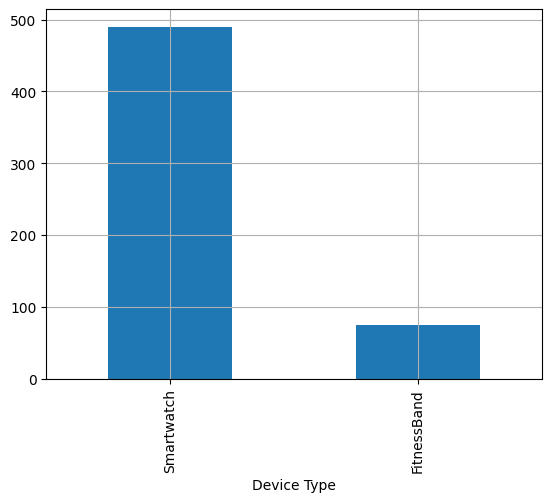

In [8]:
df["Device Type"].value_counts().plot(kind="bar")
plt.grid()

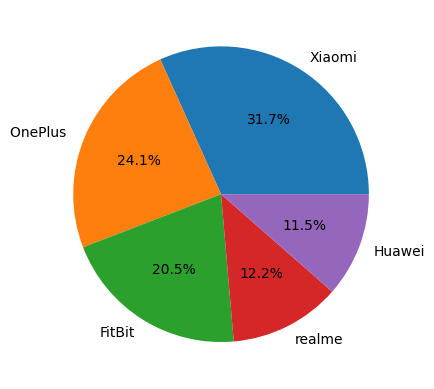

In [9]:
plt.pie(
    df['Brand Name'].value_counts()[0:5], 
    labels=df['Brand Name'].unique()[0:5], 
    autopct='%1.1f%%'
)
plt.show()

In [10]:
df['Brand Name'].groupby(df['Brand Name']).count().sort_values(ascending=False)

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
huami        36
Huawei       26
Honor        20
Noise        17
realme       12
Xiaomi       10
Fastrack      6
GOQii         4
boAt          4
OnePlus       3
Noise         2
Oppo          2
LCARE         2
LAVA          1
Infinix       1
Name: Brand Name, dtype: int64

<Axes: xlabel='count', ylabel='Brand Name'>

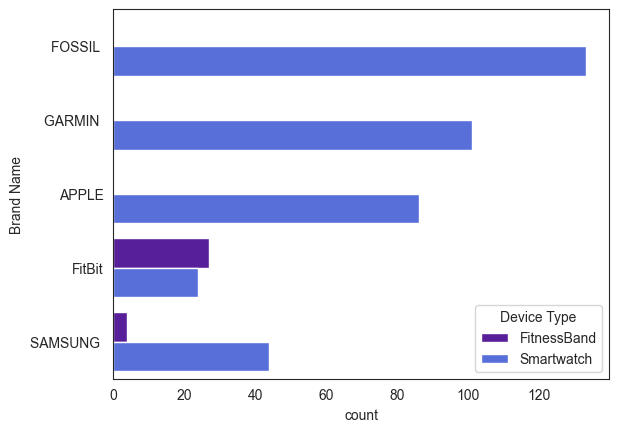

In [11]:
sns.set_style('white')
sns.countplot(y="Brand Name", hue="Device Type", data=df, palette=["#560bad","#4361EE"],
              order=df["Brand Name"].value_counts().iloc[:5].index)

In [12]:
df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10]
df.groupby('Brand Name')['Average Battery Life (in days)'].mean().sort_values(ascending=False).iloc[:10]
df['Color'].groupby(df['Color']).count().sort_values(ascending=False).iloc[:10]

Color
Black        193
Blue          30
Silver        25
Grey          21
Gold          20
White         17
Brown         13
Red           10
Black          8
Pink Sand      7
Name: Color, dtype: int64

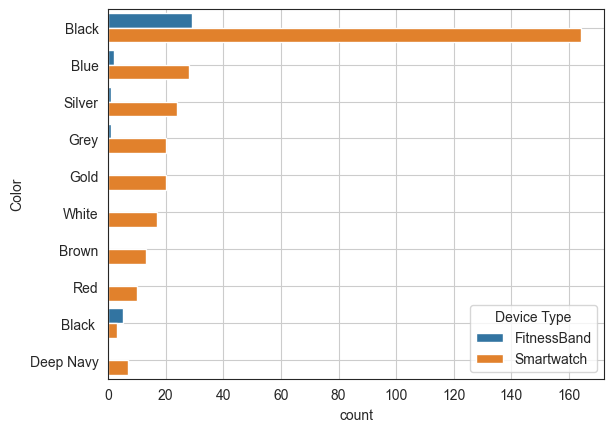

In [13]:
plt.figure()
sns.countplot(
    y="Color", 
    hue="Device Type", 
    data=df,
    order=df["Color"].value_counts().iloc[:10].index
)
plt.grid(True)

In [14]:
df['Strap Material'].groupby(df['Strap Material']).count().sort_values(ascending=False).iloc[:10]

Strap Material
Silicone                      232
Stainless Steel                97
Leather                        59
Aluminium                      57
Elastomer                      45
Thermoplastic polyurethane     33
Plastic                        16
Nylon                          12
Rubber                         11
Fabric                          1
Name: Strap Material, dtype: int64

<Axes: xlabel='count', ylabel='Strap Material'>

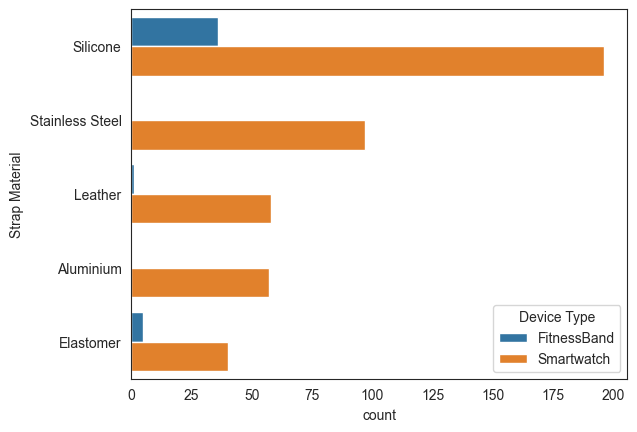

In [15]:
sns.countplot(
    y="Strap Material",
    hue="Device Type", 
    data=df,
    order=df["Strap Material"].value_counts().iloc[:5].index
)

In [16]:
y = df['Device Type']
X = df.drop('Device Type', axis=1)
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    int64  
 5   Original Price                  565 non-null    int64  
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               565 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 44.3+ KB


In [17]:
df.select_dtypes(include=['object'])

,Brand Name,Device Type,Model Name,Color,Display,Strap Material
0,Xiaomi,FitnessBand,Smart Band 5,Black,AMOLED Display,Thermoplastic polyurethane
1,Xiaomi,FitnessBand,Smart Band 4,Black,AMOLED Display,Thermoplastic polyurethane
2,Xiaomi,FitnessBand,HMSH01GE,Black,LCD Display,Leather
3,Xiaomi,FitnessBand,Smart Band 5,Black,AMOLED Display,Thermoplastic polyurethane
4,Xiaomi,FitnessBand,Band 3,Black,OLED Display,Plastic
...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,AMOLED Display,Silicone
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,AMOLED Display,Elastomer
562,GOQii,FitnessBand,HR,Black,OLED Display,Silicone
563,GOQii,FitnessBand,Vital,Black,OLED Display,Thermoplastic polyurethane


In [18]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

categorical_features_indices = ['Brand Name', 'Model Name', 'Color', 'Display', 'Strap Material']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(
    cat_features=categorical_features_indices,
    verbose=0,
    random_seed=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f"Точность модели: {accuracy}"

'Точность модели: 0.9734513274336283'

In [19]:
feature_importances = model.get_feature_importance(prettified=True)
feature_importances

,Feature Id,Importances
0,Brand Name,23.671977
1,Original Price,20.277672
2,Display,18.714235
3,Strap Material,12.082517
4,Selling Price,10.847560
5,Average Battery Life (in days),6.138505
6,Color,3.469276
7,Model Name,2.688633
8,Rating (Out of 5),2.109625
